<a href="https://colab.research.google.com/github/ImenMasmoudiEm/Brain-Tumor-Classification-DataSet/blob/master/CCKProject_Balanced_09_Tunnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification: Primary work

##Connecting to drive & importing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [3]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [4]:
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [5]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


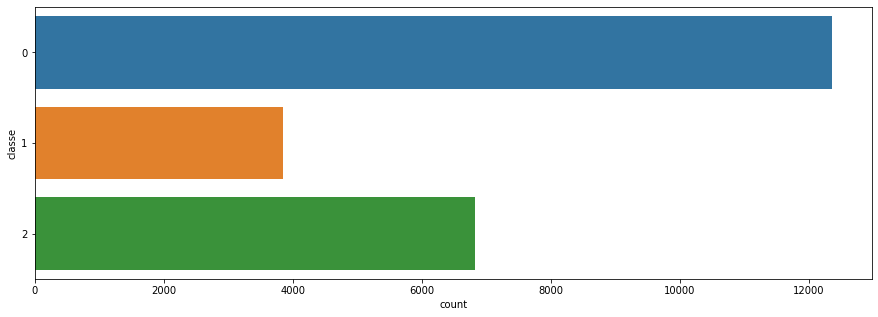

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [7]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


2/ NLP Data Preparations: Data Balancing

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


sentences = data['commentaire']
labels = data['classe']
L=[]

labels = [int(i) for i in labels]

In [9]:
i=0
c=0
Nlables=[]
Nsentences=[]

while (c<5500):
  if (labels[i]!= 0):
    Nlables.append(labels[i])
    Nsentences.append(sentences[i])
  else:
    c+=1
  i+=1
while (i<len(labels)):
  Nlables.append(labels[i])
  Nsentences.append(sentences[i])
  i+=1

sentences=[str(i) for i in sentences]

i=0
c=0

while (c<3000):
  if (Nlables[i]==1):
    Nlables.append(Nlables[i])
    Nsentences.append(Nsentences[i])
    c+=1
  i+=1

In [10]:
print(len(sentences))
print(len(labels))

23033
23033


In [11]:
import pandas as pd

data=[[i,j] for i,j in zip(Nsentences , Nlables)]

data=pd.DataFrame(data,columns=["sentences","classe"])

data

,sentences,classe
0,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
1,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
2,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
3,أنت أزاي لبؤة كدة ؟,1
4,دول عبيد باسم !! انت ما تعرفش غير ستات كده يعن...,2
...,...,...
20528,انت حمار وابن حمار وابن ابن حمار,1
20529,يلعن روحك يا هنية على هالتصريح الصرّحتو,1
20530,بيكفيكن عهر,1
20531,كل عمري إسمع عن أعور الدجيل و حمار,1


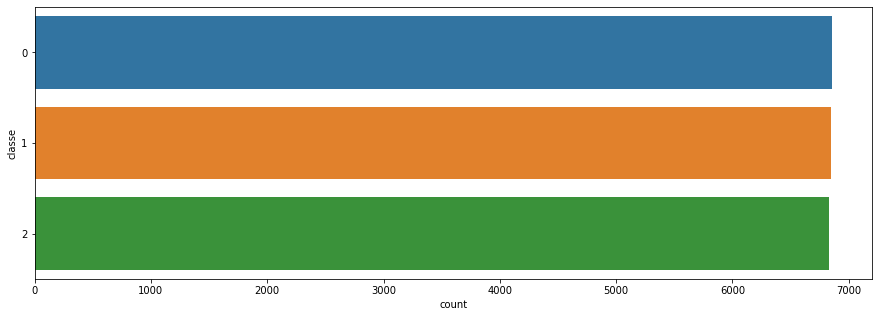

classe
0    6853
Name: classe, dtype: int64
classe
1    6850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

In [13]:
#Figure out the longest comment

def count_words(input):
  return len(input.split())
max_length=count_words(max(Nsentences,key=count_words))
max_length

207

#Importing extra data

In [15]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")
data5=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/D5.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


data5['classe']=data5['classe'].replace("hate", int(2))
data5['classe']=data5['classe'].replace("normal", int(0)) 
data5['classe']=data5['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
C3=data5["commentaire"]
L1=data12["classe"]
L2=data34["classe"]
L3=data5["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]
data5=[[i,j] for i,j in zip(C3 , L3)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])
data5=pd.DataFrame(data5,columns=["sentences","classe"])

In [18]:
data5["sentences"]=data5["sentences"].str.replace("_"," ")
data5

,sentences,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
1095,أستاذنا العزيز بلال فضل يحزنني أن يتم حذف حلقا...,0
1096,،برنامج يدعو للتفكير أكيد يمنعوه لأنهم خوافون ...,0
1097,"""#أزهى عصور المسخره هل ضيعت ""شيما"" محافظ بورس...",2
1098,الله يلعنك و يلعن اللى جابوك يا رمه جايفه,1


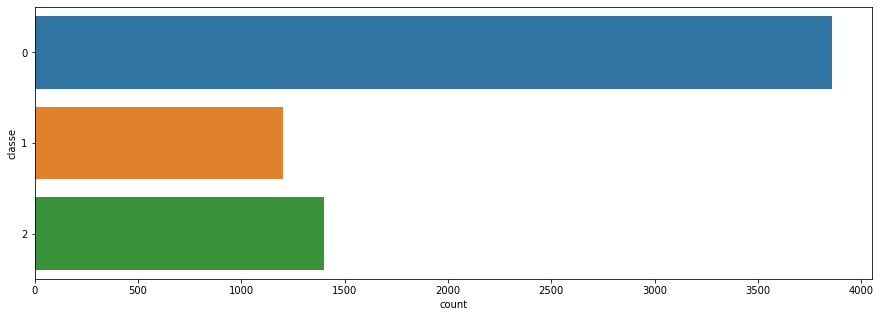

classe
0    3857
Name: classe, dtype: int64
classe
1    1204
Name: classe, dtype: int64
classe
2    1399
Name: classe, dtype: int64


In [19]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data12)
plt.show()
print(data12.loc[data12.classe==0].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==1].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==2].groupby('classe')["classe"].count())

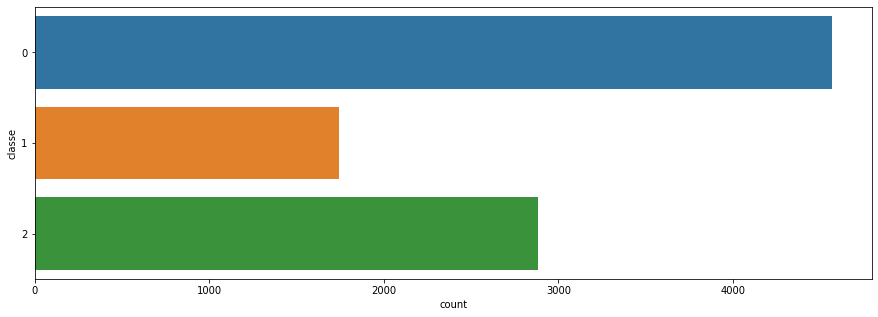

classe
0    4565
Name: classe, dtype: int64
classe
1    1746
Name: classe, dtype: int64
classe
2    2885
Name: classe, dtype: int64


In [20]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data34)
plt.show()
print(data34.loc[data34.classe==0].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==1].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==2].groupby('classe')["classe"].count())

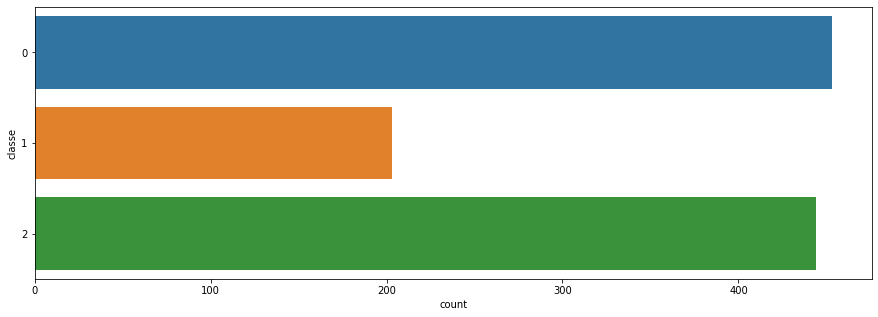

classe
0    453
Name: classe, dtype: int64
classe
1    203
Name: classe, dtype: int64
classe
2    444
Name: classe, dtype: int64


In [21]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data5)
plt.show()
print(data5.loc[data5.classe==0].groupby('classe')["classe"].count())
print(data5.loc[data5.classe==1].groupby('classe')["classe"].count())
print(data5.loc[data5.classe==2].groupby('classe')["classe"].count())

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [22]:
training_size=int(len(Nsentences)*0.8)   #Experimenting setup

training_sentences = Nsentences[0:training_size]
testing_sentences = Nsentences[training_size:]
training_labels = Nlables[0:training_size]
testing_labels = Nlables[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [23]:
vocab_size

39925

In [24]:
len(word_index)

39924

In [25]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

##########

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

##########

Nsentences5=data5["sentences"]
Nlabels5=data5["classe"]

training_size5=int(len(Nsentences5)*0.8)

testing_sentences5 = Nsentences34[training_size5:]
testing_labels5 = Nlabels34[training_size5:]

In [26]:
max_length12=count_words(max(testing_sentences12,key=count_words))
max_length12

206

In [27]:
max_length34=count_words(max(testing_sentences34,key=count_words))
max_length34

29

In [28]:
max_length5=count_words(max(testing_sentences5,key=count_words))
max_length5

52

###The Maximum length in the new data is less than 207, so we can padd them without losing information.

In [29]:
testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

###########

testing_sequences5 = tokenizer.texts_to_sequences(testing_sentences5)
testing_padded5 = pad_sequences(testing_sequences5, maxlen=max_length, padding='post', truncating='post')

#Modelling

##For The First Model

In [30]:
import tensorflow as tf

model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 16)           638800    
                                                                 
 conv1d (Conv1D)             (None, 203, 128)          10368     
                                                                 
 conv1d_1 (Conv1D)           (None, 203, 32)           4128      
                                                                 
 bidirectional (Bidirectiona  (None, 203, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 203, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 203, 32)          1

In [31]:
#For the First Model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)

training_padded = np.asarray(training_padded).astype(np.int)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.int)
testing_labels = np.asarray(testing_labels).astype(np.int)


training_labels = np.expand_dims(training_labels, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)

history = model.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

Epoch 1/50
129/129 [==============================] - 33s 156ms/step - loss: 0.9021 - accuracy: 0.5432 - val_loss: 1.0377 - val_accuracy: 0.3886
Epoch 2/50
129/129 [==============================] - 23s 180ms/step - loss: 0.6209 - accuracy: 0.7407 - val_loss: 0.6352 - val_accuracy: 0.6954
Epoch 3/50
129/129 [==============================] - 27s 213ms/step - loss: 0.4657 - accuracy: 0.8183 - val_loss: 0.6568 - val_accuracy: 0.6971
Epoch 4/50
129/129 [==============================] - 26s 199ms/step - loss: 0.4024 - accuracy: 0.8447 - val_loss: 0.4673 - val_accuracy: 0.7911
Epoch 5/50
129/129 [==============================] - 14s 112ms/step - loss: 0.3625 - accuracy: 0.8622 - val_loss: 0.4493 - val_accuracy: 0.8037
Epoch 6/50
129/129 [==============================] - 15s 116ms/step - loss: 0.3307 - accuracy: 0.8735 - val_loss: 0.4538 - val_accuracy: 0.8206
Epoch 7/50
129/129 [==============================] - 28s 219ms/step - loss: 0.3130 - accuracy: 0.8776 - val_loss: 0.3734 - val_ac

In [38]:
model.save('model1Balanced09.h5')

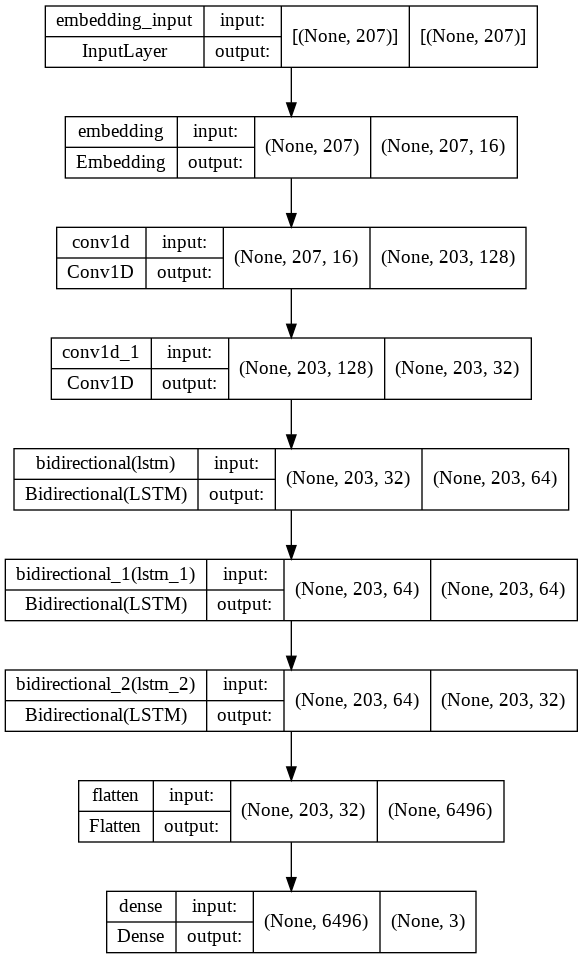

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

pred=model.predict(testing_padded)
rounded_labels1=np.argmax(pred, axis=1).astype(int)
cm = confusion_matrix(testing_labels, rounded_labels1)
print(cm)
print(classification_report(testing_labels, rounded_labels1, labels=[0,1,2]))

[[ 697   13   28]
 [  40 2937  163]
 [  14    6  209]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       738
           1       0.99      0.94      0.96      3140
           2       0.52      0.91      0.66       229

    accuracy                           0.94      4107
   macro avg       0.81      0.93      0.85      4107
weighted avg       0.96      0.94      0.94      4107



In [34]:
pred12=model.predict(testing_padded12)
rounded_labels112=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels112)
print(cm12)
print(classification_report(testing_labels12, rounded_labels112, labels=[0,1,2]))

[[276 119 192]
 [  9 214  30]
 [ 18 147 287]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       587
           1       0.45      0.85      0.58       253
           2       0.56      0.63      0.60       452

    accuracy                           0.60      1292
   macro avg       0.64      0.65      0.60      1292
weighted avg       0.70      0.60      0.61      1292



In [35]:
pred34=model.predict(testing_padded34)
rounded_labels134=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels134)
print(cm34)
print(classification_report(testing_labels34, rounded_labels134, labels=[0,1,2]))

[[  81   16  429]
 [   0    7    0]
 [   3    4 1300]]
              precision    recall  f1-score   support

           0       0.96      0.15      0.27       526
           1       0.26      1.00      0.41         7
           2       0.75      0.99      0.86      1307

    accuracy                           0.75      1840
   macro avg       0.66      0.72      0.51      1840
weighted avg       0.81      0.75      0.69      1840



In [36]:
pred5=model.predict(testing_padded5)
rounded_labels15=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels15)
print(cm5)
print(classification_report(testing_labels5, rounded_labels15, labels=[0,1,2]))

[[2957   95  983]
 [ 304  522  628]
 [  76  160 2591]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      4035
           1       0.67      0.36      0.47      1454
           2       0.62      0.92      0.74      2827

    accuracy                           0.73      8316
   macro avg       0.72      0.67      0.67      8316
weighted avg       0.76      0.73      0.72      8316



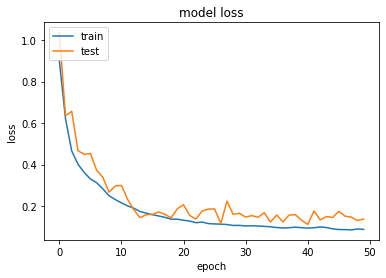

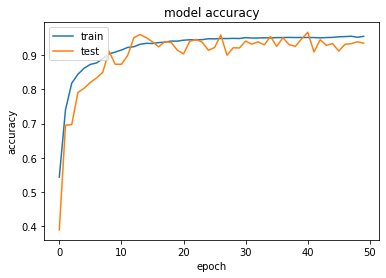

In [37]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For the Second Model

In [44]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 207, 16)           638800    
                                                                 
 conv1d_5 (Conv1D)           (None, 203, 128)          10368     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 24)                3096      
                                                                 
 dense_11 (Dense)            (None, 2)                 50        
                                                      

In [46]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


history = model2.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
129/129 [==============================] - 2s 8ms/step - loss: 0.5748 - accuracy: 0.7439 - val_loss: 1.0252 - val_accuracy: 0.2535
Epoch 2/50
129/129 [==============================] - 1s 7ms/step - loss: 0.5708 - accuracy: 0.7483 - val_loss: 1.0309 - val_accuracy: 0.2637
Epoch 3/50
129/129 [==============================] - 1s 7ms/step - loss: 0.5683 - accuracy: 0.7521 - val_loss: 1.0460 - val_accuracy: 0.3031
Epoch 4/50
129/129 [==============================] - 1s 6ms/step - loss: 0.5643 - accuracy: 0.7545 - val_loss: 1.0232 - val_accuracy: 0.2997
Epoch 5/50
129/129 [==============================] - 1s 6ms/step - loss: 0.5596 - accuracy: 0.7612 - val_loss: 1.0112 - val_accuracy: 0.3027
Epoch 6/50
129/129 [==============================] - 1s 6ms/step - loss: 0.5511 - accuracy: 0.7647 - val_loss: 1.0305 - val_accuracy: 0.3533
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 0.5456 - accuracy: 0.7764 - val_loss: 0.9852 - val_accuracy: 0.3516
Epoch 

In [47]:
model2.save('model2Balanced09.h5')

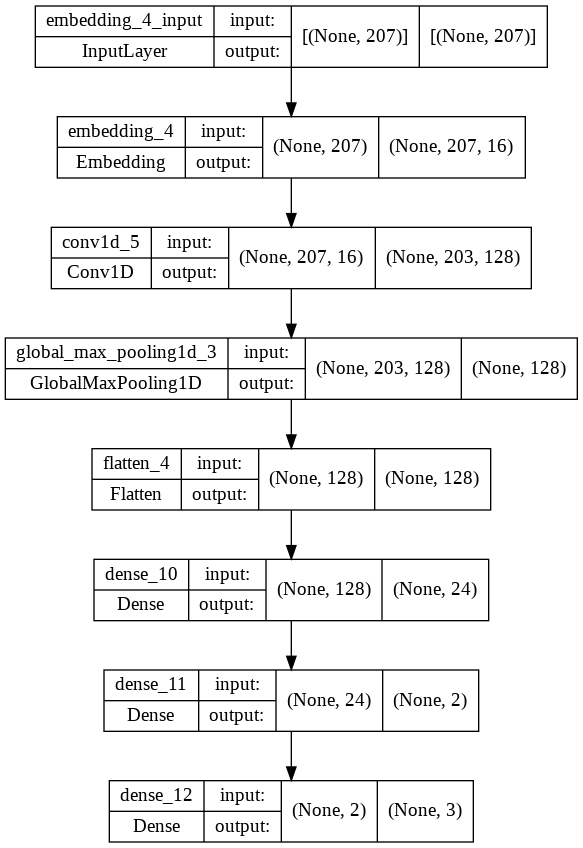

In [48]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [49]:
pred1=model2.predict(testing_padded)

pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
print(cm)
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

[[ 689   36   13]
 [  53 2971  116]
 [   4   27  198]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       738
           1       0.98      0.95      0.96      3140
           2       0.61      0.86      0.71       229

    accuracy                           0.94      4107
   macro avg       0.84      0.91      0.87      4107
weighted avg       0.95      0.94      0.94      4107



In [50]:
pred12=model2.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

[[275 206 106]
 [ 21 209  23]
 [ 17 191 244]]
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       587
           1       0.34      0.83      0.49       253
           2       0.65      0.54      0.59       452

    accuracy                           0.56      1292
   macro avg       0.63      0.61      0.56      1292
weighted avg       0.70      0.56      0.58      1292



In [51]:
pred34=model2.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

[[  54   40  432]
 [   0    2    5]
 [   0    6 1301]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.19       526
           1       0.04      0.29      0.07         7
           2       0.75      1.00      0.85      1307

    accuracy                           0.74      1840
   macro avg       0.60      0.46      0.37      1840
weighted avg       0.82      0.74      0.66      1840



In [52]:
pred5=model2.predict(testing_padded5)
rounded_labels25=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels25)
print(cm5)
print(classification_report(testing_labels5, rounded_labels25, labels=[0,1,2]))

[[2874  263  898]
 [ 307  580  567]
 [  61  179 2587]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      4035
           1       0.57      0.40      0.47      1454
           2       0.64      0.92      0.75      2827

    accuracy                           0.73      8316
   macro avg       0.70      0.68      0.67      8316
weighted avg       0.75      0.73      0.72      8316



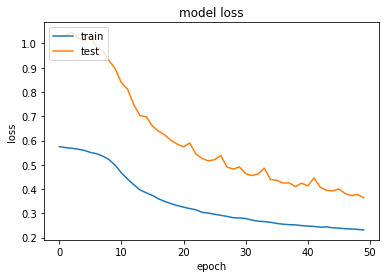

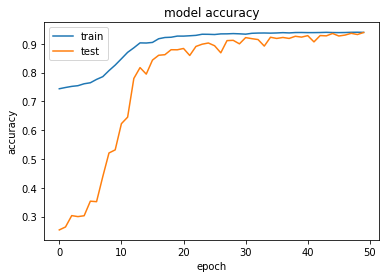

In [53]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For The Third Model

In [54]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 207, 16)           638800    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 24)                1560      
                                                                 
 dense_14 (Dense)            (None, 3)                 75        
                                                                 
Total params: 652,979
Trainable params: 652,979
Non-trainable params: 0
________________________________________________

In [55]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model3.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
129/129 [==============================] - 6s 25ms/step - loss: 0.9664 - accuracy: 0.5259 - val_loss: 1.2246 - val_accuracy: 0.1904
Epoch 2/50
129/129 [==============================] - 2s 18ms/step - loss: 0.6632 - accuracy: 0.7108 - val_loss: 0.8487 - val_accuracy: 0.6206
Epoch 3/50
129/129 [==============================] - 2s 18ms/step - loss: 0.4919 - accuracy: 0.8114 - val_loss: 0.5996 - val_accuracy: 0.7499
Epoch 4/50
129/129 [==============================] - 2s 18ms/step - loss: 0.4175 - accuracy: 0.8425 - val_loss: 0.5188 - val_accuracy: 0.7887
Epoch 5/50
129/129 [==============================] - 2s 18ms/step - loss: 0.3824 - accuracy: 0.8520 - val_loss: 0.4675 - val_accuracy: 0.8283
Epoch 6/50
129/129 [==============================] - 2s 18ms/step - loss: 0.3558 - accuracy: 0.8631 - val_loss: 0.4510 - val_accuracy: 0.8113
Epoch 7/50
129/129 [==============================] - 2s 18ms/step - loss: 0.3398 - accuracy: 0.8688 - val_loss: 0.3612 - val_accuracy: 0.8476

In [56]:
model3.save('model3Balanced09.h5')

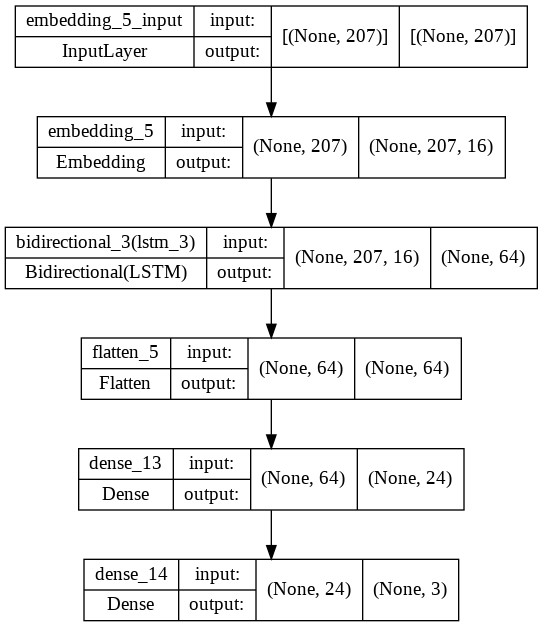

In [57]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [58]:
pred3=model3.predict(testing_padded)
rounded_labels3=np.argmax(pred3, axis=1).astype(int)
cm2 = confusion_matrix(testing_labels, rounded_labels3)
print(cm2)
print(classification_report(testing_labels, rounded_labels3, labels=[0,1,2]))

[[ 677   31   30]
 [  22 3039   79]
 [  12    9  208]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       738
           1       0.99      0.97      0.98      3140
           2       0.66      0.91      0.76       229

    accuracy                           0.96      4107
   macro avg       0.87      0.93      0.89      4107
weighted avg       0.96      0.96      0.96      4107



In [59]:
pred12=model3.predict(testing_padded12)
rounded_labels312=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels312)
print(cm12)
print(classification_report(testing_labels12, rounded_labels312, labels=[0,1,2]))

[[243 213 131]
 [ 11 226  16]
 [  9 194 249]]
              precision    recall  f1-score   support

           0       0.92      0.41      0.57       587
           1       0.36      0.89      0.51       253
           2       0.63      0.55      0.59       452

    accuracy                           0.56      1292
   macro avg       0.64      0.62      0.56      1292
weighted avg       0.71      0.56      0.57      1292



In [60]:
pred34=model3.predict(testing_padded34)
rounded_labels334=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels334)
print(cm34)
print(classification_report(testing_labels34, rounded_labels334, labels=[0,1,2]))

[[  79   27  420]
 [   0    7    0]
 [   1   14 1292]]
              precision    recall  f1-score   support

           0       0.99      0.15      0.26       526
           1       0.15      1.00      0.25         7
           2       0.75      0.99      0.86      1307

    accuracy                           0.75      1840
   macro avg       0.63      0.71      0.46      1840
weighted avg       0.82      0.75      0.68      1840



In [61]:
pred5=model3.predict(testing_padded5)
rounded_labels35=np.argmax(pred5, axis=1).astype(int)
cm5 = confusion_matrix(testing_labels5, rounded_labels35)
print(cm5)
print(classification_report(testing_labels5, rounded_labels35, labels=[0,1,2]))

[[2857  180  998]
 [ 272  584  598]
 [  56  182 2589]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      4035
           1       0.62      0.40      0.49      1454
           2       0.62      0.92      0.74      2827

    accuracy                           0.73      8316
   macro avg       0.71      0.68      0.67      8316
weighted avg       0.75      0.73      0.72      8316



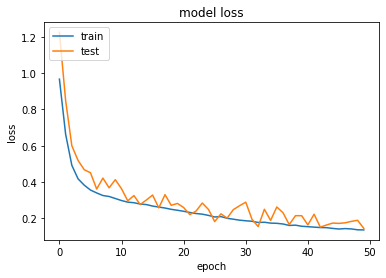

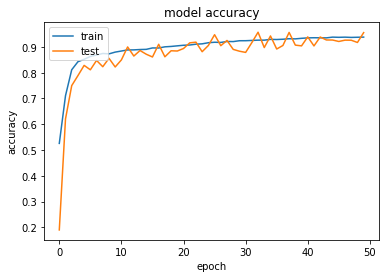

In [62]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling